### EXPLORACION DATOS

In [203]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [4]:
medidas = pd.read_csv('measurements.csv')
medidas.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [33]:
medidas.shape

(388, 12)

In [43]:
medidas2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [59]:
medidas2.columns = medidas2.columns.str.replace(' ','_')
medidas2.columns = medidas2.columns.str.lower()
medidas2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [64]:
df = medidas2.copy()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   ac             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  13 non-null     float64
 11  refill_gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,376.0,21.929521,1.010455,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
ac,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0
refill_liters,13.0,37.115385,8.587282,10.0,37.60,38.0,39.0,45.0


In [87]:
df.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [83]:
df.specials.value_counts() #30  valores que contiene AC

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [84]:
df.ac.value_counts() #30 valores que contiene AC

0    358
1     30
Name: ac, dtype: int64

##### Columna specials,los dummies estan bien hechos salvo la columna snow que no está contemplada, así que haremos una nueva columna

In [90]:
df.specials.fillna('unknown', inplace=True)

In [129]:
df['snow'] = df['specials'].str.contains('snow', regex=True).astype(int) #Hechos los dummies tambien para snow

In [130]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'ac', 'rain', 'sun', 'snow', 'refill_liters',
       'refill_gas'],
      dtype='object')

In [131]:
columnas = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'ac', 'rain', 'sun','snow', 'refill_liters',
       'refill_gas']
df = df.reindex(columns=columnas)
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,snow,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,unknown,E10,0,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,unknown,E10,0,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,unknown,E10,0,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,unknown,E10,0,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,unknown,E10,0,0,0,0,NaN,NaN


##### Conpletado el dummies de SNOW dropeo specials

In [227]:
df.refill_liters.fillna('0', inplace=True)
df.refill_liters.value_counts('0')

0       0.966495
45.0    0.005155
37.7    0.005155
39.0    0.005155
37.6    0.002577
38.0    0.002577
38.3    0.002577
10.0    0.002577
41.0    0.002577
37.0    0.002577
37.2    0.002577
Name: refill_liters, dtype: float64

In [228]:
df.to_excel('consumos.xlsx', index = False)

##### Vamos a ver la matriz de correlaciones

<AxesSubplot:>

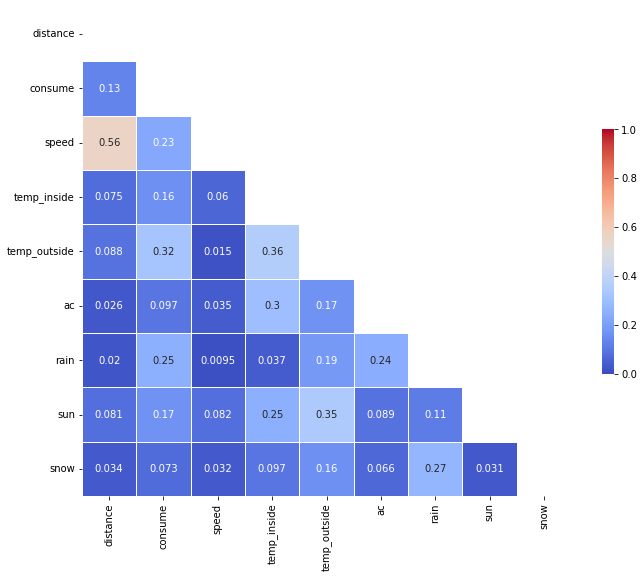

In [168]:
corr = df.corr().abs() #matriz correlaciones

mask = np.triu(np.ones_like(corr, dtype=bool)) #Enmascaramos la diagonal superior

f, ax = plt.subplots(figsize=(11, 9)) #Tamaño

sns.heatmap(corr, mask=mask, cmap='coolwarm',annot=True, vmax=1, vmin=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### Queremos mirar el consumo, lo que tienes mas peso según nuestra matriz es:
- TEMP_OUTSIDE
- RAIN
- SPEED

#### TEMP_OUTSIDE

<AxesSubplot:xlabel='temp_bins', ylabel='consume'>

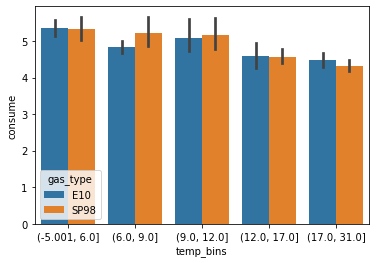

In [182]:
df['temp_bins'] = pd.qcut(df['temp_outside'], 5)
sns.barplot(x='temp_bins', y='consume', hue='gas_type',data=df)

### RAIN

<AxesSubplot:xlabel='rain', ylabel='consume'>

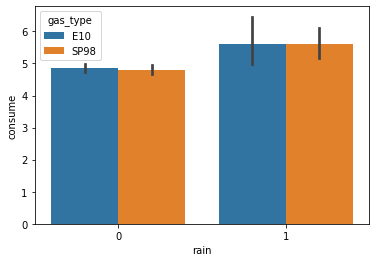

In [185]:
sns.barplot(data=df, y="consume", x ="rain"  , hue="gas_type")

### SPEED:

<AxesSubplot:xlabel='speed_bins', ylabel='consume'>

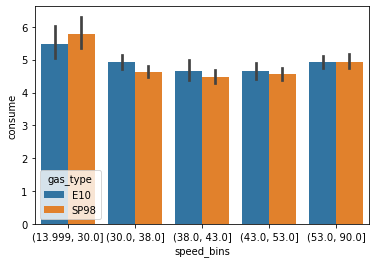

In [188]:
df['speed_bins'] = pd.qcut(df['speed'], 5)
sns.barplot(x='speed_bins', y='consume', hue='gas_type',data=df)

### Vamos a separar unos y otros en 2 DF para verlo por separado:

In [195]:
e10 = df[df.gas_type == 'E10']
sp98 = df[df.gas_type == 'SP98']

### PARA E10:

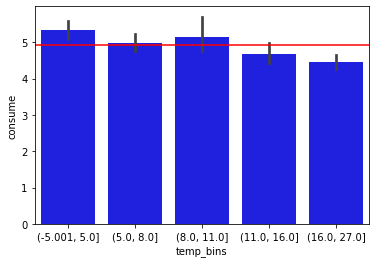

In [233]:
e10['temp_bins'] = pd.qcut(e10['temp_outside'], 5)
temp = sns.barplot(x='temp_bins', y='consume',data=e10, color='blue')
temp.axhline(y = e10.consume.mean(), c="red", label="mean");

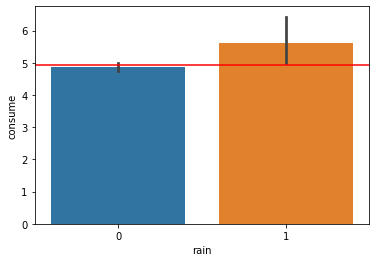

In [213]:
rain = sns.barplot(data=e10, y="consume", x ="rain")
rain.axhline(y=e10.consume.mean(), c="red", label="mean");

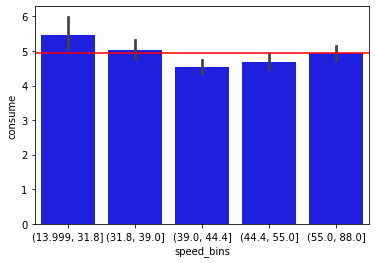

In [235]:
e10['speed_bins'] = pd.qcut(e10['speed'], 5)
speed = sns.barplot(x='speed_bins', y='consume',data=e10,color='blue')
speed.axhline(y=e10.consume.mean(), c="red", label="mean");


### PARA SP98

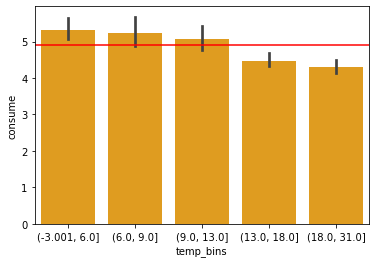

In [226]:
sp98['temp_bins'] = pd.qcut(sp98['temp_outside'], 5)
temp = sns.barplot(x='temp_bins', y='consume',data=sp98,color="orange")
temp.axhline(y = sp98.consume.mean(), c="red", label="mean");

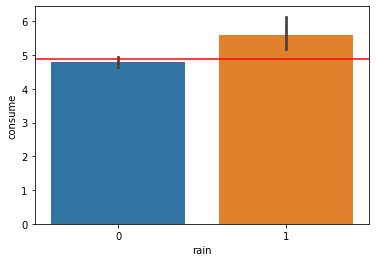

In [220]:
rain = sns.barplot(data=sp98, y="consume", x ="rain")
rain.axhline(y=sp98.consume.mean(), c="red", label="mean");

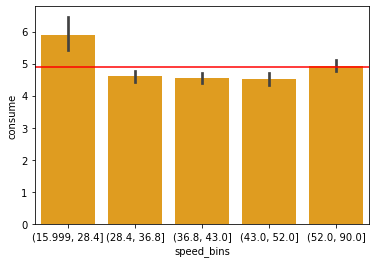

In [224]:
sp98['speed_bins'] = pd.qcut(sp98['speed'], 5)
speed = sns.barplot(x='speed_bins', y='consume',data=sp98, color="orange")
speed.axhline(y=sp98.consume.mean(), c="red", label="mean");